<center><h2> <b> COHORT ANALYSIS STUDY CASE FOR BEGINNER </b></h2> </center>
<center> <b> BY ADITYA DAMAR JATI </b> </center>
<center>  <a = 'https://www.linkedin.com/in/adityadj/'> Linkedin </a> | <a = 'https://medium.com/@adityadj'> Medium </a> | <a = 'https://id.quora.com/profile/Aditya-Damar-Jati'> Quora  </a> </center>

## **PROLOG**
Cohort analysis is a powerful analytical tool that is commonly used in marketing, product development, and user research. At its core, cohort analysis is a method of tracking and comparing the behavior and characteristics of groups of people over time.

A cohort can be defined as a group of people who share a common characteristic or experience within a defined time period. For example, a cohort of customers who signed up for a service in January, or a cohort of users who first downloaded a mobile app in 2020.

The purpose of cohort analysis is to identify patterns and trends in the behavior of different groups of users or customers over time. By tracking cohorts and comparing their behavior to each other, we can gain insights into how different groups are interacting with our product or service, and how their behavior changes over time.

For example, we might use cohort analysis to compare the retention rates of users who signed up for a service in January versus those who signed up in February. This can help us identify factors that might be affecting retention, such as changes in the onboarding process or feature updates.

The benefits of cohort analysis are numerous. By understanding how different groups of users behave over time, we can make more informed decisions about product development, marketing, and customer acquisition. Cohort analysis can help us identify areas where we need to improve the user experience, and can also help us identify new opportunities for growth.

### **Task**
   
To complete this task, use the data set in the attached file. Indicate the answer to each of the following steps and time to complete the entire task.

download [event_data.csv](https://file.notion.so/f/s/3d249c69-fd8f-419f-8606-554c9a089cd7/event_data.csv?id=4aee6221-8b87-4949-9752-fba146c1360f&table=block&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1680223034978&signature=s_50G8PoJRuTRW5qwsLqVuQwtmO7Yb1xJNzqVYvWFls&downloadName=event_data.csv)

### Question 1
Download the event_data.csv dataset, which contains data on the use of the mobile application of users who registered from July 29 to September 1, 2019:
1. user_id - user identifier;
2. event_date - time of the event;
3. event_type - type of event: registration - registration in the application; 
simple_event - click event in the application; purchase - an event of purchase within the application; purchase_amount - purchase amount.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

df = pd.read_csv('https://file.notion.so/f/s/3d249c69-fd8f-419f-8606-554c9a089cd7/event_data.csv?id=4aee6221-8b87-4949-9752-fba146c1360f&table=block&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1680489218562&signature=cthWhvNTE9LkbcATB9q-vCFY2BpdQ2RwbZQzOQwF9r0&downloadName=event_data.csv')
df

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN
...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN
79738,a84999,2019-09-01 23:57:50,simple_event,NaN
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN


### Question 2
Highlight user cohorts based on the week of registration in the application. The cohort identifier should be the week ordinal (for example, the week from July 29 to August 4 should have identifier 31)

In [2]:
# convert event_date to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# extract the week number of registration
df['cohort_week'] = df['event_date'].dt.isocalendar().week.astype(int)

#check this new table
df.head()

,user_id,event_date,event_type,purchase_amount,cohort_week
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31


In [3]:
# make new data frame just for "registration" in event_type
# Don't forget to make new index
registration_df = df.loc[df['event_type'] == 'registration'].copy().reset_index(drop=True)
registration_df

,user_id,event_date,event_type,purchase_amount,cohort_week
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31
...,...,...,...,...,...
9991,a7c20c,2019-09-01 23:36:39,registration,NaN,35
9992,03e836,2019-09-01 23:38:18,registration,NaN,35
9993,fb0e00,2019-09-01 23:41:25,registration,NaN,35
9994,46b4f8,2019-09-01 23:41:57,registration,NaN,35


In [4]:
# I just wanna check for uniqueness for user_id
if df['user_id'].nunique() == len(registration_df):
    print("This is compeletely unique")
else:
    print("This is not unique")

This is compeletely unique


### Question 3
How many unique users in the cohort with ID 33?

In [5]:
# we use dont use df data frame because there is a lot of duplicate. We use registration_df data frame because its uniqueness in user_id
df_unique_users = registration_df.groupby('cohort_week')['user_id'].nunique().reset_index()
df_unique_users = df_unique_users.rename(columns={'user_id': 'total_user'})
df_unique_users
# well, we know the answer is 2045!

,cohort_week,total_user
0,31,1975
1,32,1952
2,33,2045
3,34,1974
4,35,2050


### Question 4
For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The
lifetime indicator is calculated based on the serial number of the week in which the event
is committed, relative to the week of registration. For example, an event committed on
August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero
week of lifetime, and an event committed by the same user on August 5 will be committed
on the first week of lifetime).

In [6]:
# making column "first_regist", week that the user did a registration
grouping1 = df.groupby('user_id')['cohort_week']
df['first_regist'] = grouping1.transform('min')
df

,user_id,event_date,event_type,purchase_amount,cohort_week,first_regist
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31
...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33


In [7]:
# calculate lifetime
df['lifetime'] = df['cohort_week'] - df['first_regist']
df

,user_id,event_date,event_type,purchase_amount,cohort_week,first_regist,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


### Question 5
Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

In [8]:
df['event_type'].value_counts()
# we drop "purchase" because it is not part for of customer retention
# actually "registration" is not part of customer retention too but for now this is an exception 
# because Question number 4 want me to get  lifetime by using customer  registration date

simple_event    63539
registration     9996
purchase         6207
Name: event_type, dtype: int64

In [9]:
# so we will use this data frame to create retention table
event_df = df[df["event_type"] != "purchase"].reset_index(drop=True)
event_df

,user_id,event_date,event_type,purchase_amount,cohort_week,first_regist,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
73530,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
73531,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
73532,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
73533,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


In [10]:
grouping_count = event_df.groupby(['first_regist', 'lifetime'])

cohort_data = grouping_count['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data = cohort_data.rename(columns={'first_regist': 'week'})
cohort_counts = cohort_data.pivot(index='week',
                                  columns='lifetime',
                                  values='user_id')
cohort_counts

lifetime,0,1,2,3,4
week,,,,,
31,1975.0,1824.0,1228.0,695.0,290.0
32,1952.0,1808.0,1253.0,689.0,NaN
33,2045.0,1885.0,1343.0,NaN,NaN
34,1974.0,1826.0,NaN,NaN,NaN
35,2050.0,NaN,NaN,NaN,NaN


In [11]:
# --Calculate Retention Rate by Percentage--
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention

lifetime,0,1,2,3,4
week,,,,,
31,1.0,0.923544,0.621772,0.351899,0.146835
32,1.0,0.926230,0.641906,0.352971,NaN
33,1.0,0.921760,0.656724,NaN,NaN
34,1.0,0.925025,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,NaN


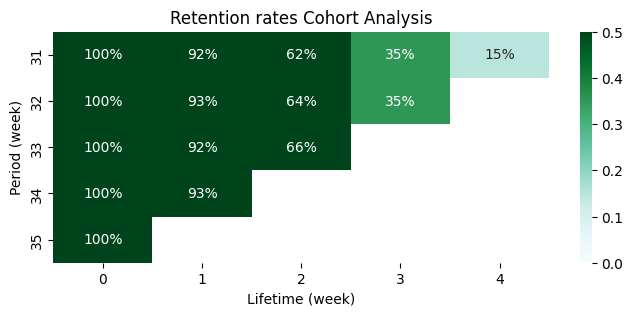

In [12]:
import matplotlib.pyplot as plt

# Plot retention rates
plt.figure(figsize=(8, 3))
plt.title('Retention rates Cohort Analysis')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.xlabel('Lifetime (week)')
plt.ylabel('Period (week)')
plt.show()

That is cohort analysis. In X-line (lifetime) is describe about retention over user lifetime. Then in Y-line(Period) is describe about retention over product lifetime.

### Question 6
What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent,
rounded to 2 decimal places, inclusive.

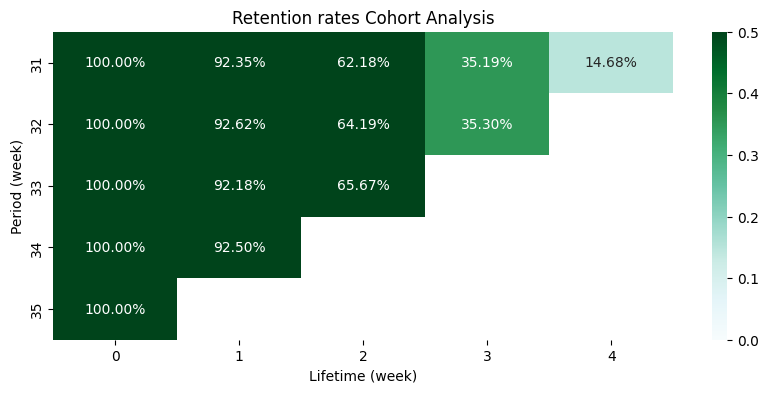

In [13]:
# Because we want to see the answer rounded to 2 decimal place, so we change the "fmt" into ".2%". 
# Then we will know the retention rate with ID 32 (period) and at 3 weeks is 35.30% !
plt.figure(figsize=(10, 4))
plt.title('Retention rates Cohort Analysis')
sns.heatmap(data = retention, annot = True, fmt = '.2%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.xlabel('Lifetime (week)')
plt.ylabel('Period (week)')
plt.show()

### Question 7
Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying
User) for cohorts depending on lifetime.

In [14]:
# First we take the data from df just only with purchase activity in event_type
purchase_df = df[df["event_type"] == "purchase"].reset_index(drop=True)
purchase_df

,user_id,event_date,event_type,purchase_amount,cohort_week,first_regist,lifetime
0,51dc02,2019-07-29 11:43:11,purchase,10.0,31,31,0
1,f1c95f,2019-07-29 11:48:46,purchase,50.0,31,31,0
2,a13a2b,2019-07-29 14:50:07,purchase,10.0,31,31,0
3,deccc0,2019-07-29 23:38:20,purchase,50.0,31,31,0
4,11e04e,2019-07-30 03:08:15,purchase,50.0,31,31,0
...,...,...,...,...,...,...,...
6202,7f27ee,2019-09-01 23:31:37,purchase,10.0,35,32,3
6203,e1d4ac,2019-09-01 23:39:00,purchase,50.0,35,33,2
6204,f1b677,2019-09-01 23:39:49,purchase,50.0,35,33,2
6205,0a5860,2019-09-01 23:54:50,purchase,30.0,35,35,0


In [15]:
purchase_df[purchase_df['purchase_amount']==20]

,user_id,event_date,event_type,purchase_amount,cohort_week,first_regist,lifetime
9,4b7638,2019-07-30 20:08:50,purchase,20.0,31,31,0
13,c07b73,2019-07-31 02:15:23,purchase,20.0,31,31,0
20,d525fe,2019-07-31 07:09:03,purchase,20.0,31,31,0
28,7fd6a7,2019-07-31 13:31:56,purchase,20.0,31,31,0
32,0d7844,2019-07-31 15:01:42,purchase,20.0,31,31,0
...,...,...,...,...,...,...,...
6181,7775a2,2019-09-01 20:58:11,purchase,20.0,35,35,0
6190,60f1c3,2019-09-01 22:17:44,purchase,20.0,35,35,0
6191,fd4a2d,2019-09-01 22:26:28,purchase,20.0,35,35,0
6196,dc64d7,2019-09-01 22:57:29,purchase,20.0,35,34,1


In [16]:
# --Calculate Average Price--
grouping_price = purchase_df.groupby(['first_regist', 'lifetime'])
cohort_data_price = grouping_price['purchase_amount'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='first_regist',
                                     columns='lifetime',
                                     values='purchase_amount')
average_price

lifetime,0,1,2,3,4
first_regist,,,,,
31,28.132911,29.511494,30.525000,29.142857,30.454545
32,30.222841,29.773692,29.928741,29.528302,NaN
33,30.689655,30.519663,29.171975,NaN,NaN
34,30.776699,30.929134,NaN,NaN,NaN
35,30.721925,NaN,NaN,NaN,NaN


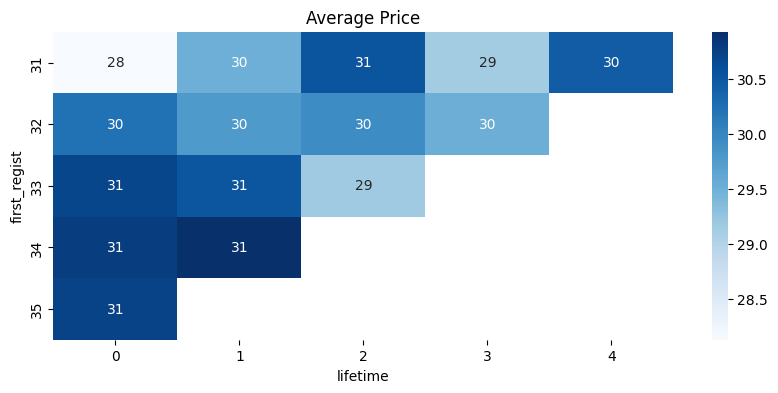

In [17]:
# Plot average price
plt.figure(figsize=(10, 4))
plt.title('Average Price')
sns.heatmap(data = average_price, annot=True, cmap='Blues')
plt.show()

### Question 8
What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point
number, rounded to 2 decimal places, inclusive.

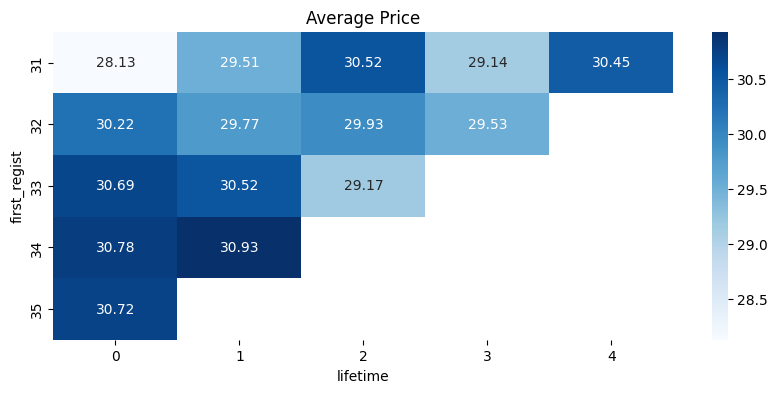

In [18]:
# Because the question want to have rounded 2 decimal's answer, so we add fmt = '.2f'
plt.figure(figsize=(10, 4))
plt.title('Average Price')
sns.heatmap(data = average_price, fmt = '.2f', annot=True, cmap='Blues')
plt.show()

### Question 9
What is the median time between user registration and first purchase? Give the answer
in seconds (!) As an integer.

In [19]:
find_median_df = df

# Filter the data to only include events of "registration" and "purchase"
find_median_df = find_median_df[(find_median_df['event_type'] == 'registration') | (find_median_df['event_type'] == 'purchase')]

# Convert the event_date column to a datetime object
find_median_df['event_date'] = pd.to_datetime(find_median_df['event_date'])

# Group the data by user_id and calculate the time difference between the first "registration" and "purchase" events
time_diff = find_median_df.groupby('user_id').apply(lambda x: (x[x['event_type'] == 'purchase']['event_date'].min() - x[x['event_type'] == 'registration']['event_date'].min()).seconds)

# Calculate the median of the time differences in seconds
median_time = time_diff.median()

median_time


C:\Users\ASUS\AppData\Local\Temp\ipykernel_42224\1258173240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  find_median_df['event_date'] = pd.to_datetime(find_median_df['event_date'])


43623.0

In [20]:
# Print the median time in seconds as an integer
int(median_time)

43623

### **CLOSING**


Overall, cohort analysis is a valuable tool for any organization looking to better understand its customers or users. By tracking and comparing the behavior of different cohorts over time, we can gain deep insights into how our products and services are being used, and how we can continue to improve the user experience.

<center> Best Regards, </center>
<center> Aditya D. Jati </center>


